### MATH 6388: Statistical and Machine Learning, Fall 2022 
### Homework 3

### Problem 1
In this problem, we consider a Bayesian view of linear regression $y_i=\boldsymbol{\theta}^T\mathbf{x}_i+\epsilon_i$, $i=1,\ldots,N$, $\mathbf{x}_i\in\mathbb{R}^D$, which can be expressed as $\mathbf{y}=\mathbf{X}\boldsymbol{\theta}+\boldsymbol{\epsilon}$. Therefore, $\mathbf{X}\in\mathbb{R}^{N\times D}$ is the data matrix, $\mathbf{y}\in\mathbb{R}^N$ is the output vector, and the goal is to estimate $\boldsymbol{\theta}\in\mathbb{R}^D$. Let us define the prior on the parameter $\boldsymbol{\theta}$ as $p(\boldsymbol{\theta})=\mathcal{N}(\mathbf{0}, \tau_\theta^{-1}\mathbf{I})$,
	where $\tau_\theta$ is a known scalar that controls the variance of the Gaussian prior. 
  
Recall that the multivariate normal distribution of a $D$-dimensional vector $\mathbf{z}$ with mean $\boldsymbol{\mu}\in\mathbb{R}^D$ and covariance matrix $\boldsymbol{\Sigma}\in\mathbb{R}^{D\times D}$ is given by the following probability density function ($|\boldsymbol{\Sigma}|$ is the determinant of $\boldsymbol{\Sigma}$)
    
$$\mathcal{N}(\boldsymbol{\mu},\boldsymbol{\Sigma})=\frac{1}{|2\pi\boldsymbol{\Sigma}|^{1/2}}\exp\left(-\frac{1}{2}(\mathbf{z}-\boldsymbol{\mu})^T\boldsymbol{\Sigma}^{-1}(\mathbf{z}-\boldsymbol{\mu})\right)$$

Also define the likelihood as $p(\mathcal{D}|\boldsymbol{\theta})=\mathcal{N}(\mathbf{X}\boldsymbol{\theta},\tau_n^{-1}\mathbf{I})$, where $\tau_n$ is another fixed scalar defining the variance of noise.

Part 1: Show that maximizing the log  posterior, i.e., $\log p(\boldsymbol{\theta}|\mathcal{D})$, has the following form

$$
		\text{argmax}_{\boldsymbol{\theta}} \log p(\boldsymbol{\theta}|\mathcal{D})= \text{argmax}_{\boldsymbol{\theta}}\big[ \log p(\boldsymbol{\theta})+ \log p(\mathcal{D}|\boldsymbol{\theta})\big].
$$
		
Hint: you can use the Bayes' theorem and conclude that the posterior is proportional to the prior times the likelihood.

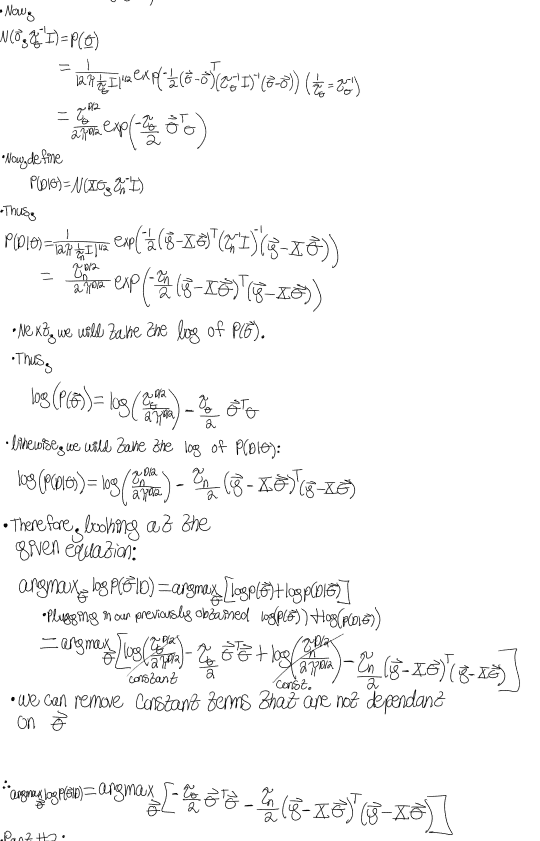

Part 2: Show that maximizing the log posterior is equivalent to minimizing a regularized loss function in the following form for a $\lambda$ expressed in terms of the constants $\tau_\theta$ and $\tau_n$

$$
\mathcal{L}(\boldsymbol{\theta})+\lambda \mathcal{R}(\boldsymbol{\theta}),
$$

where
$$
		\mathcal{L}(\boldsymbol{\theta})=\frac{1}{2}\|\mathbf{y}-\mathbf{X}\boldsymbol{\theta}\|_2^2, \;\;\mathcal{R}(\boldsymbol{\theta})=\frac{1}{2} \|\boldsymbol{\theta}\|_2^2
$$

Hint: you may want to drop constant terms and recall that for any vector $\boldsymbol{\theta}$, we have $\boldsymbol{\theta}^T\boldsymbol{\theta}=\|\boldsymbol{\theta}\|_2^2$.

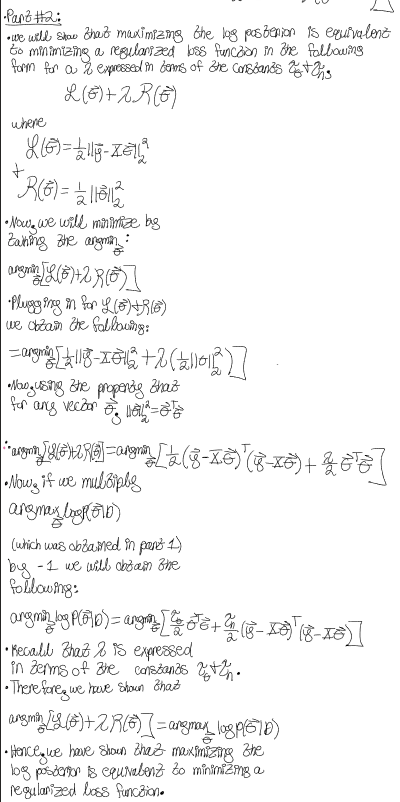

Part 3: Notice that the form of the posterior is the same as the form of the ridge regression loss. Compute the gradient of the loss function with respect to $\boldsymbol{\theta}$.

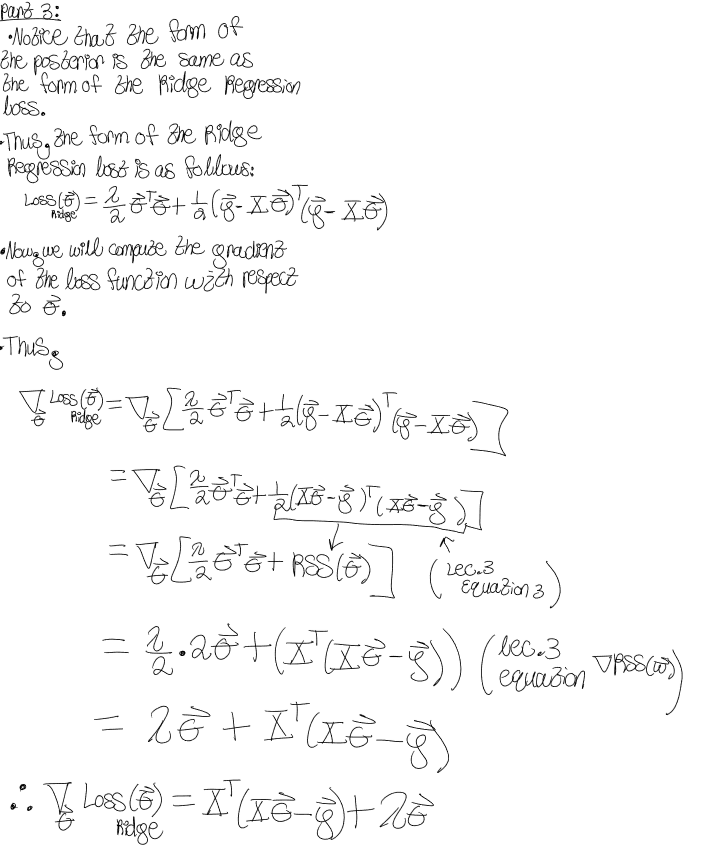

Part 4: Conclude that the solution of the above optimization problem is 
$$
		\boldsymbol{\theta}^*=(\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}
$$

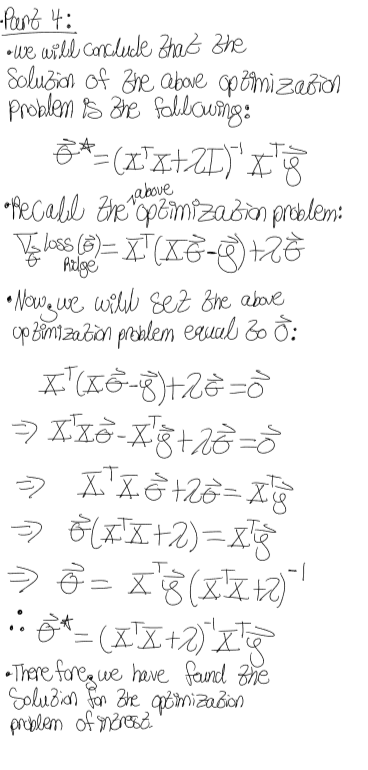

### Problem 2

Suppose you are using Ridge Regression and you notice that the training error and the testing error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter $\lambda$ or reduce it?

If I am using Ridge Regression and I notice that the training error and the testing error are almost equal and fairly high I would say that the model is suffering from a very high bias & a lower variance (due to variance-bias trade-off), i.e. the model is underfitting. We would want to increase the complexity of the model by reducing the hyperparamter $\lambda$ as this will lead to a decreased bias and an increased variance, which is what we are needing here.

### Problem 3

Can you accurately predict medical insurance costs based on age, bmi, and other features? To answer this question, let us work with the "insurance.csv" file and import required libraries.



In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

Part 1: load the data set as a DataFrame and look at its first 4 rows.  

In [2]:
insurance_data = pd.read_csv('insurance.csv')

In [3]:
# Obtaining the first 4 rows of the newly created DataFrame
df_first_4 = insurance_data.head(4)
df_first_4

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


Part 2: Use the “describe” method to generate descriptive statistics.

In [4]:
# We will use the "describe" function to
# generate descriptive statistics

insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Part 3: Did the "describe" method generate descriptive statistics for categorical/qualitative columns/features?

The "describe" method (using the describe function) generated descriptive statistics for only the qualitative columns/features and not the categprical columns/features.

Part 4: It looks like that we have to convert categorical features into numerical ones by using built-in methods in Pandas such as get_dummies() which will return the dummy variable columns. Create a new DataFrame called df_numeric, where all columns have numerical values. Therefore, after using get_dummies(), you should drop the original categorical columns.

In [5]:
df_numeric = pd.get_dummies(insurance_data, columns = ['sex', 'smoker', 'region', ])

In [6]:
df_numeric

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


Part 5: We have prepared our data for fitting a linear regression model. In this step, form the data matrix $\mathbf{X}$ and the output vector $\mathbf{y}$ in the form of NumPy arrays.

In [7]:
# Create the Data Matrix X
X = df_numeric.drop(columns = ['charges'])

In [8]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [9]:
# Create output vector y
y = df_numeric['charges']

In [10]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Part 6: Use function train_test_split to divide the data into two subsets: training and testing (80/20 split).

In [11]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, train_size=0.8, random_state=33)

Part 7: Proceed with the procedure of importing and fitting the Linear Regression model (finally!).

In [12]:
# Create linear regression "object"
regr = linear_model.LinearRegression()

#pipe = Pipeline(steps=[('regr', LinearRegression(fit_intercept=False))])

In [36]:
# Train the model using the training set
regr.fit(X_train, y_train)

LinearRegression()

Part 8: Create a new DataFrame to present estimated coefficients obtained by our model (you should use pd.DataFram with appropriate "index" and "columns" arguments).

In [38]:
coeff_df = pd.DataFrame(data = pipe.named_steps['regr'].coef_, index = ['age', 'bmi', 'children', 'sex_female', 'sex_male',
                                                   'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 
                                                    'region_southeast','region_southwest'], columns = ['Estimated Coefficients'])
coeff_df

,Estimated Coefficients
age,256.240883
bmi,355.046246
children,530.811766
sex_female,-217.392877
sex_male,-619.265472
smoker_no,-12545.010829
smoker_yes,11708.352480
region_northeast,664.846105
region_northwest,33.049523
region_southeast,-911.084109


Part 9: Based on your analysis, how does smoking affect health insurance premiums?

Based upon my analysis it appears that smoking has a negative affect on health insurance premiums as the obtained estimated regression coefficient for the variable that represents people who are smokers is a very large positive number, meaning it will greatly increase your cost of insurance. 

Furthermore, based upon the analysis we can see that NOT smoking can actually decrease insurance premiums as it is a large negative number, meaning it will decrease costs. 

Part 10: Use the test data set, also known as the holdout data, to evaluate the trained model for predicting “charges”. Use at least one metric such as MSE, R2, etc. 

In [39]:
# Make predictions using the testing set
y_pred = pipe.predict(X_test)

In [40]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 37749182.63


In [41]:

# coefficient of determination
from sklearn.metrics import r2_score
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.70
